In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
input_data = pd.read_csv('../data/dataA/merge_rawdata(no_ageStructure).csv')
# print(input_data.head())
print(input_data.columns)
# '城市名称', '年份', '人均消费支出', '人均可支配收入', '从业人员数', '第一产业从业人员数', '第二产业从业人员数',
# '第三产业从业人员数', '常住人口（万人）', '户籍人口（万人）', '人口密度（人/平方公里）', '农村居民消费支出',
# '农村居民人均收入', '城镇居民消费支出', '城镇居民人均收入', '城镇失业率', '城镇化率', '工资水平'
groups = input_data.groupby('城市名称',sort=False)
print(f"城市数量:{len(groups)}")

Index(['城市名称', '年份', 'consumptionExpenditures', 'disposableIcome',
       'employeesNumber', 'pi_Employment', 'si_Employment', 'ti_Employment',
       '常住人口（万人）', '户籍人口（万人）', '人口密度（人/平方公里）', 'rural_ConsumptionExpenditures',
       'rural_disposableIcome', 'towner_ConsumptionExpenditures',
       'towner_disposableIcome', 'unemploymentRate', 'urbanizationRate',
       'wage'],
      dtype='object')
城市数量:40


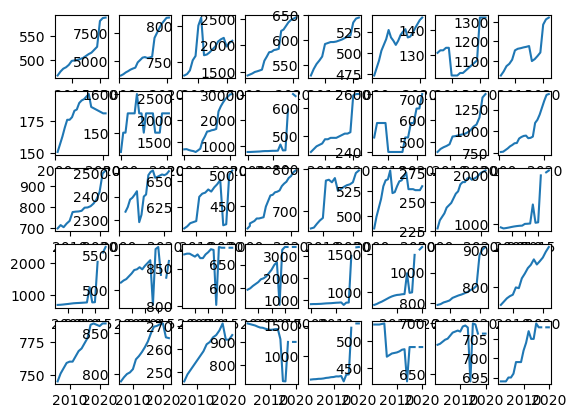

In [14]:
for i,(name,group) in enumerate(groups):
  plt.subplot(5,8,i+1)
  group = group.sort_values(by='年份')
  # 绘制人口密度变化曲线
  plt.plot(group['年份'],group['人口密度（人/平方公里）'],label=name)
plt.show()

出现的问题：
city8：16，18，19三年应该是异常值，数据是以往几年的10倍，应该是单位搞错了
city12，city13： 16，18，19三年是异常值
city31：02为异常值
city26，city34，city37：17，19，20为异常值

In [15]:
input_data = pd.read_csv('../data/clean_lx/populationDensity.csv')
groups = input_data.groupby('城市名称',sort=False)
print(f"城市数量:{len(groups)}")

城市数量:40


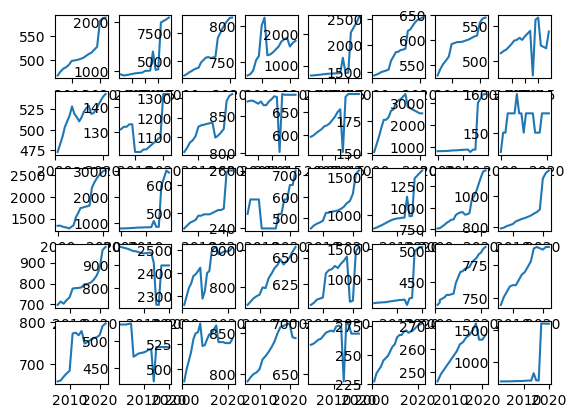

In [14]:
for i,(name,group) in enumerate(groups):
  plt.subplot(5,8,i+1)
  group = group.sort_values(by='年份')
  # 绘制人口密度变化曲线
  plt.plot(group['年份'],group['人口密度（人/平方公里）'],label=name)
plt.show()

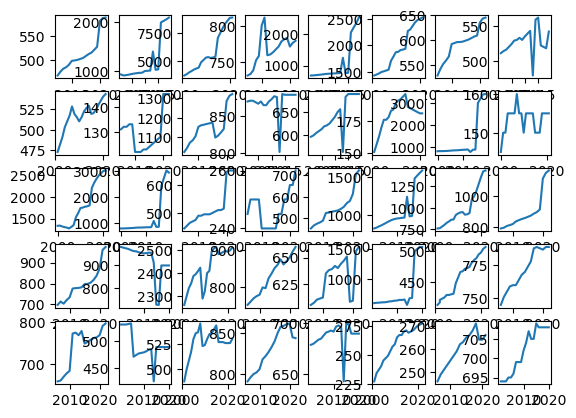

In [16]:
# 使用插值方式填充城市的人口密度
for name,group in groups:
  group = group.sort_values(by='年份')
  group['人口密度（人/平方公里）'] = group['人口密度（人/平方公里）'].interpolate(method='linear',limit_direction='both')
  input_data.loc[input_data['城市名称']==name,'人口密度（人/平方公里）'] = group['人口密度（人/平方公里）'].values

# 绘制城市的人口密度变化变化曲线
for i,(name,group) in enumerate(groups):
  plt.subplot(5,8,i+1)
  group = group.sort_values(by='年份')
  # 绘制人口密度变化曲线
  plt.plot(group['年份'],group['人口密度（人/平方公里）'],label=name)
plt.show()

input_data.to_csv('../data/clean_lx/populationDensity.csv',index=False)

我嘞个豆，怎么搞了半天还是这么不平滑。知难而退，我睡了/(ㄒoㄒ)/~~